In [ ]:
import cv2
import json
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Untitled folder/Scenario9/train_data_sequence.csv',header = None)

val_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Untitled folder/Scenario9/val_data_sequence.csv',header=None)

In [ ]:
y_train_d=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Untitled folder/Scenario9/Scenario9/development_dataset/scenario9_dev_train.csv')['beam_index_1']
y_val_d=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Untitled folder/Scenario9/Scenario9/development_dataset/scenario9_dev_val.csv')['beam_index_1']
Y_=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Untitled folder/Scenario9/Scenario9/development_dataset/scenario9_dev_train.csv')
Y_v=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Untitled folder/Scenario9/Scenario9/development_dataset/scenario9_dev_val.csv')

In [ ]:
y_train_d

,0
0,1
1,1
2,1
3,2
4,2
...,...
4194,61
4195,61
4196,61
4197,61


In [ ]:
def power(Y):
  pwr_=Y
  B=pd.read_csv(pwr_[10],header=None)
  pwr=pd.DataFrame(np.zeros([len(pwr_),len(B)]))
  for i in range(0,len(pwr_)):
      pwr.iloc[i]=pd.read_csv(pwr_[i], engine='python',header=None,encoding='utf-8').transpose()
  pwr=pd.DataFrame(pwr)
  pwr.columns=range(1,len(pwr.columns)+1)
  return pwr

In [ ]:
pwr_train=power(Y_['unit1_pwr_1'])
pwr_val=power(Y_v['unit1_pwr_1'])

In [ ]:
pwr_train.index=range(1,len(pwr_train)+1)
pwr_val.index=range(1,len(pwr_val)+1)
pwr_train.columns=range(1,len(pwr_train.columns)+1)
pwr_val.columns=range(1,len(pwr_val.columns)+1)

In [ ]:
Y_train_d=pd.DataFrame(np.argmax(pwr_train,axis=1))
Y_val_d=pd.DataFrame(np.argmax(pwr_val,axis=1))
Y_val_d[0]

In [ ]:
y_train_d=Y_train_d[0]
y_val_d=Y_val_d[0]

In [ ]:
train=pd.concat([train_data,y_train_d],axis=1)
val=pd.concat([val_data,y_val_d], axis=1)

In [ ]:
train.replace(0, np.nan, inplace=True)
train=train.dropna(axis=0)
val=val.dropna(axis=0)
val.replace(0, np.nan, inplace=True)

<ipython-input-95-4f02b95a3b1d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val.replace(0, np.nan, inplace=True)


In [ ]:
train.columns=range(1,len(train.columns)+1)
val.columns=range(1,len(val.columns)+1)

In [ ]:
train.iloc[:,-1]

,69
1,1.0
2,1.0
3,2.0
4,2.0
5,3.0
...,...
4194,61.0
4195,61.0
4196,61.0
4197,61.0


In [ ]:
x_train=train.iloc[:, :-1]
y_train=train.iloc[:,-1]
x_val = val.iloc[:, :-1]
y_val=val.iloc[:,-1]

In [ ]:
y_train

,69
1,1.0
2,1.0
3,2.0
4,2.0
5,3.0
...,...
4194,61.0
4195,61.0
4196,61.0
4197,61.0


In [ ]:
y_train=pd.DataFrame(y_train)
y_train.columns=['beam_index']

In [ ]:
y_train=pd.DataFrame(y_train.astype('int32'))
y_val=pd.DataFrame(y_val.astype('int32'))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(pd.DataFrame(y_train).reset_index(drop=True))
y_train_data=pd.DataFrame(encoded_data).astype('int32')
y_val_data=pd.DataFrame(encoder.fit_transform(pd.DataFrame(y_val).reset_index(drop=True))).astype('int32')
y_train_data.index=y_train.index
y_val_data.index=y_val.index

In [ ]:
y_train_data

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
x_train.index=y_train.index
x_val.index=y_val.index

In [ ]:
x_train

,1,2,3,4,5,6,7,8,9,10,...,59,60,61,62,63,64,65,66,67,68
1,0.088821,0.587531,0.177024,0.183743,0.052805,0.141448,0.117988,0.092978,0.056348,0.042463,...,0.013025,0.010687,0.010897,0.012241,0.013329,0.011951,0.013595,0.010122,0.009696,0.010050
2,0.099275,0.585492,0.196866,0.188108,0.065835,0.163193,0.143936,0.102785,0.077288,0.069838,...,0.013330,0.009865,0.010937,0.011899,0.011986,0.011187,0.012319,0.012160,0.011119,0.010742
3,0.109426,0.584612,0.216717,0.188561,0.116079,0.220888,0.222399,0.193965,0.154150,0.139714,...,0.013072,0.013113,0.014398,0.013634,0.012950,0.011570,0.013647,0.014557,0.012113,0.010887
4,0.123993,0.583391,0.246529,0.185623,0.116294,0.248128,0.277341,0.268870,0.233659,0.226222,...,0.011833,0.015413,0.015927,0.014709,0.014715,0.013033,0.014154,0.015540,0.013901,0.013151
5,0.134234,0.575830,0.267922,0.200915,0.087374,0.277255,0.363052,0.378319,0.351669,0.343723,...,0.015467,0.018176,0.018515,0.020308,0.017848,0.011938,0.012636,0.015454,0.013198,0.014540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,0.938061,0.562707,0.123111,0.182712,0.011013,0.016379,0.011699,0.014443,0.014984,0.013343,...,0.040657,0.073392,0.150784,0.245538,0.316556,0.361591,0.422724,0.471345,0.293786,0.020743
4195,0.946974,0.553916,0.105397,0.163753,0.016255,0.021078,0.016353,0.018693,0.023287,0.017677,...,0.029943,0.040909,0.093119,0.208288,0.266721,0.359629,0.428250,0.521264,0.367287,0.023057
4196,0.956087,0.552347,0.087180,0.152475,0.011596,0.018948,0.014019,0.012046,0.018674,0.014754,...,0.026497,0.041641,0.082191,0.191135,0.294055,0.394026,0.553914,0.660961,0.378082,0.030727
4197,0.968485,0.554662,0.062301,0.131858,0.009768,0.019239,0.017627,0.018746,0.023984,0.013983,...,0.042313,0.040063,0.036315,0.092140,0.160148,0.256787,0.403083,0.547355,0.325865,0.026025


In [ ]:
l=6

In [ ]:
Y_train=pd.DataFrame(np.zeros([len(y_train),l]))
for i in range(l,len(y_train)):
    Y_train.iloc[i,:]=y_train.iloc[i-l:i].transpose()

In [ ]:
Y_val=pd.DataFrame(np.zeros([len(y_val),l]))
for i in range(l,len(y_val)):
  Y_val.iloc[i,:]=y_val.iloc[i-l:i].transpose()

In [ ]:
y_train.head(10)

,beam_index
1,1
2,1
3,2
4,2
5,3
6,5
7,6
8,7
9,10
10,10


In [ ]:
Y_train.index=y_train.index
Y_val.index=y_val.index

In [ ]:
X_train=pd.concat([x_train.iloc[:,:4],Y_train],axis=1)
X_val=pd.concat([x_val.iloc[:,:4],Y_val],axis=1)

In [ ]:
np.savetxt('X_train.csv',X_train,delimiter=',')

In [ ]:

X_training=X_train.iloc[l:]
X_valid=X_val.iloc[l:]
Y_training=y_train_data.iloc[l:]
Y_valid=y_val_data.iloc[l:]

In [ ]:
X_training

,1,2,3,4,0,1,2,3,4,5
7,0.158934,0.586547,0.316603,0.184483,1.0,1.0,2.0,2.0,3.0,5.0
8,0.171734,0.585939,0.337923,0.186454,1.0,2.0,2.0,3.0,5.0,6.0
9,0.194314,0.582831,0.332534,0.189356,2.0,2.0,3.0,5.0,6.0,7.0
10,0.226497,0.583023,0.329019,0.187576,2.0,3.0,5.0,6.0,7.0,10.0
11,0.248947,0.582884,0.325361,0.186904,3.0,5.0,6.0,7.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...
4194,0.938061,0.562707,0.123111,0.182712,54.0,56.0,57.0,58.0,59.0,61.0
4195,0.946974,0.553916,0.105397,0.163753,56.0,57.0,58.0,59.0,61.0,61.0
4196,0.956087,0.552347,0.087180,0.152475,57.0,58.0,59.0,61.0,61.0,61.0
4197,0.968485,0.554662,0.062301,0.131858,58.0,59.0,61.0,61.0,61.0,61.0


In [ ]:
np.savetxt('/content/drive/MyDrive/Colab Notebooks/Untitled folder/Scenario9/X_valid.csv',X_valid,delimiter=',')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,GRU
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.optimizers import SGD

In [ ]:
import keras
from tensorflow.keras import layers

In [ ]:
regressor = Sequential()

regressor.add(GRU(units=200, return_sequences = True, input_shape=(len(X_training.columns), 1)))




regressor.add(GRU(units=200, activation='relu',return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(GRU(units=200,activation='relu'))
regressor.add(Dropout(0.2))




#Output layer
regressor.add(Dense(len(y_train_data.columns),activation='softmax'))

regressor.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
early_stop_callback = EarlyStopping(monitor='val_loss', patience=10, mode='min')
prediction=regressor.fit(X_training,Y_training,

                         validation_data=[X_valid,Y_valid],
                         epochs=500,
                         batch_size=2000,
                         #callbacks=[early_stop_callback]
                        )

Epoch 1/300
3/3 [==============================] - 14s 2s/step - loss: 4.0714 - accuracy: 0.0586 - val_loss: 3.8032 - val_accuracy: 0.1119
Epoch 2/300
3/3 [==============================] - 4s 1s/step - loss: 3.8008 - accuracy: 0.1083 - val_loss: 3.6285 - val_accuracy: 0.1282
Epoch 3/300
3/3 [==============================] - 5s 1s/step - loss: 3.6370 - accuracy: 0.1347 - val_loss: 3.4878 - val_accuracy: 0.2083
Epoch 4/300
3/3 [==============================] - 6s 2s/step - loss: 3.4878 - accuracy: 0.1674 - val_loss: 3.2907 - val_accuracy: 0.2134
Epoch 5/300
3/3 [==============================] - 4s 1s/step - loss: 3.3214 - accuracy: 0.1815 - val_loss: 3.1143 - val_accuracy: 0.2220
Epoch 6/300
3/3 [==============================] - 4s 1s/step - loss: 3.1811 - accuracy: 0.1966 - val_loss: 2.9437 - val_accuracy: 0.2194
Epoch 7/300
3/3 [==============================] - 7s 2s/step - loss: 3.0328 - accuracy: 0.2090 - val_loss: 2.7915 - val_accuracy: 0.2616
Epoch 8/300
3/3 [================

In [ ]:
train_pred = regressor.predict(X_training)
val_pred = regressor.predict(X_valid)
val_pred1=val_pred.argmax()
predi = pd.DataFrame(prediction.history)
#test_pred = regressor.predict(x_test_data).flatten()

37/37 [==============================] - 2s 41ms/step


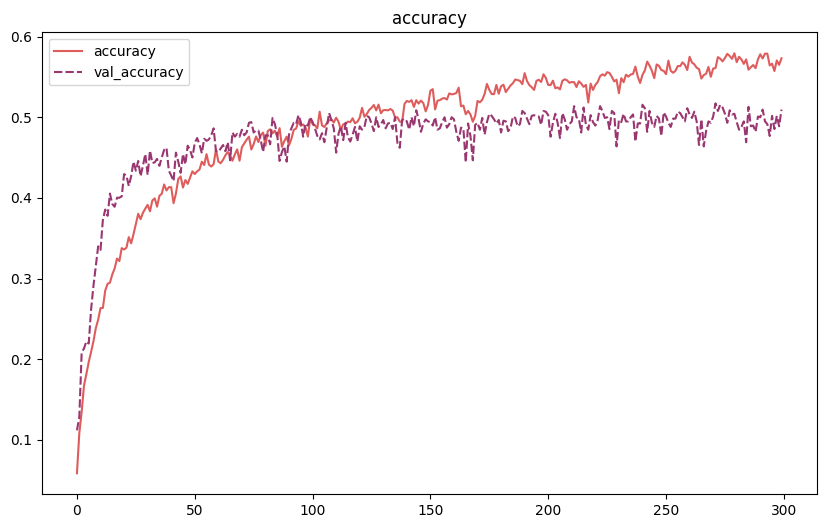

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
predi_loss = predi[['accuracy','val_accuracy']]
plt.title("accuracy")
sns.lineplot(predi_loss,palette="flare");


In [ ]:
Z=np.zeros([len(train_pred),20])
for i in range(0,len(train_pred)):
    Z[i]=pd.DataFrame(train_pred).iloc[i].nlargest(20).index
Z=pd.DataFrame(Z).astype('int32')

In [ ]:
T=np.zeros([len(val_pred),20])
for i in range(0,len(val_pred)):
    T[i]=pd.DataFrame(val_pred).iloc[i].nlargest(20).index
T=pd.DataFrame(T).astype('int32')

In [ ]:
T.index=y_val.iloc[l:].index
Z.index=y_train.iloc[l:].index

In [ ]:
R=T[0]+2
A=R==y_val['beam_index'].iloc[l:].tolist()
G=10
for j in range(0,G):
  for i in T.index:
      if (A[i]!=True):
         A[i]=T[j][i]+2==y_val['beam_index'].iloc[l:][i]

In [ ]:
def top_k_accuracy(k,T,y):
    R=T[0]+2
    A=R==y.tolist()
    for j in range(1,k):
       for i in T.index:
          if (A[i]!=True):
              A[i]=T[j][i]+2==y[i]
    acc=(pd.DataFrame(A).value_counts()[True])/len(T)
    return   acc*100

In [ ]:
H=10
accu_val=np.zeros([H,1])
for i in range(1,H):
  accu_val[i]=top_k_accuracy(i,T,y_val['beam_index'].iloc[l:])


In [ ]:
H=10
accu_train=np.zeros([H,1])
for i in range(1,H):
  accu_train[i]=top_k_accuracy(i,Z,y_train['beam_index'].iloc[l:])


In [ ]:
accuracy=pd.concat([pd.DataFrame(accu_train),pd.DataFrame(accu_val)],axis=1)
accuracy.columns=['train_accuracy','val_accuracy']
accuracy = accuracy.drop(accuracy.iloc[0])

In [ ]:
np.savetxt('Accuracy.csv',accuracy,delimiter=',')

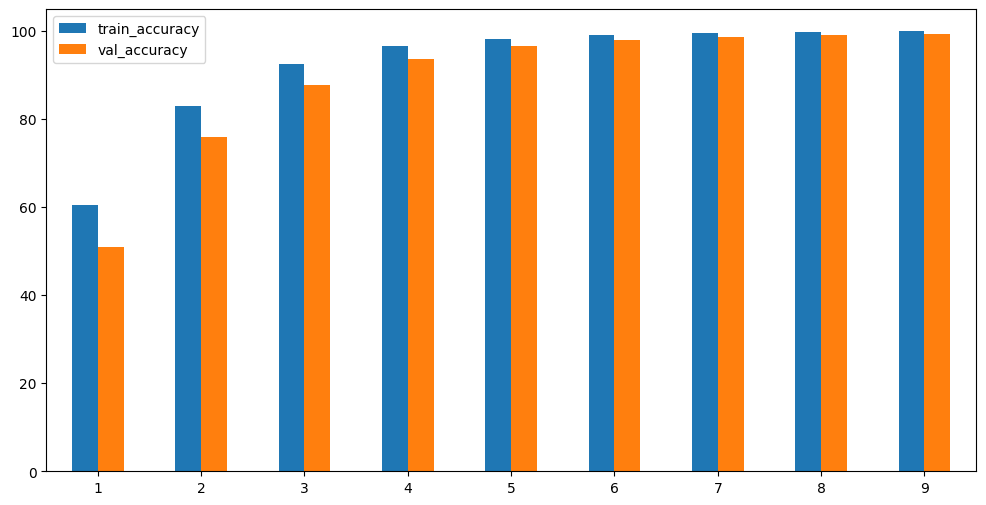

In [ ]:
 ax1 = accuracy.plot(kind='bar', rot=0, figsize=(12,6))

In [ ]:
pd.DataFrame(accuracy['val_accuracy'])

,val_accuracy
1,50.946644
2,75.817556
3,87.779690
4,93.631670
5,96.471601
6,98.020654
7,98.623064
8,99.139415
9,99.225473


Text(0.5, 0, 'value of k')

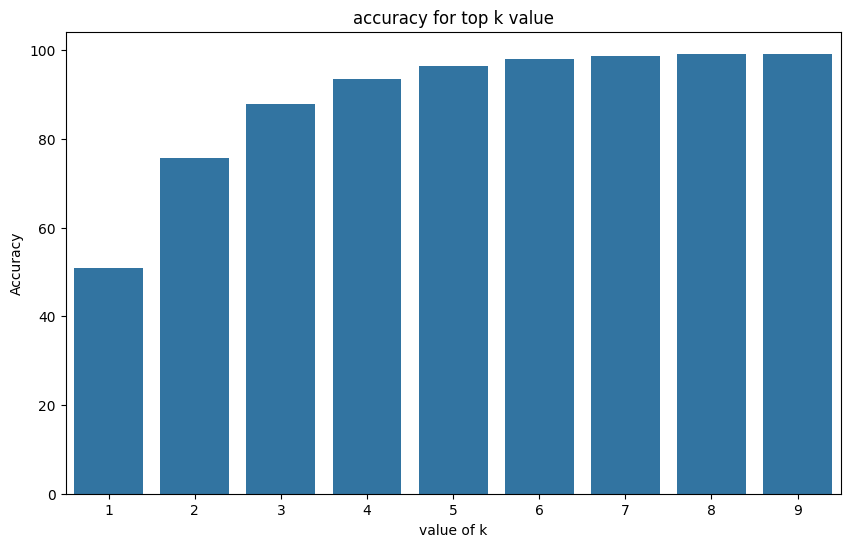

In [ ]:
plt.figure(figsize=(10,6))
plt.title('accuracy for top k value')
sns.barplot(x=pd.DataFrame(accuracy).index,y=accuracy['val_accuracy']);
plt.ylabel("Accuracy")
plt.xlabel("value of k")


In [ ]:
from joblib import dump, load
# Save the model as a pickle in a file
dump(regressor, '/content/drive/MyDrive/Colab Notebooks/Untitled folder/Scenario9/Scenario9/regressor.pkl')

['/content/drive/MyDrive/Colab Notebooks/Untitled folder/Scenario9/Scenario9/regressor.pkl']